# 머신러닝 알고리즘

## 회귀(Regression)
    - 선형모델

## 분류(Classification)
    - 로지스틱 선형 모델
    - KNN
    - Decision Tree
    - Random Forest
    - SVM

## 인공신경망

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mglearn
from matplotlib import rc, font_manager
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc("font", family=font_name)
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False
#!pip install mglearn

(26, 2)


C:\Users\User\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


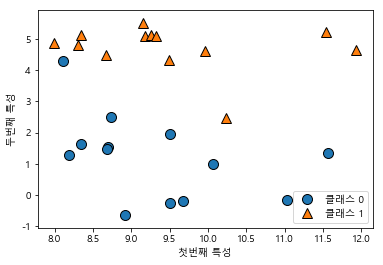

In [11]:
x, y = mglearn.datasets.make_forge()
x
y
mglearn.discrete_scatter(x[:, 0], x[:, 1], y)
plt.legend(['클래스 0', '클래스 1'], loc=4)
plt.xlabel('첫번째 특성')
plt.ylabel('두번째 특성')

print(x.shape)


Text(0, 0.5, '타겟')

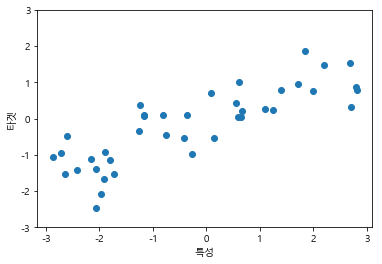

In [12]:
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel('특성')
plt.ylabel('타겟')

In [27]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
cancer.keys()
cancer.data.shape

# 569 데이터 중에서 212개는 악성이고 357개는 양성이다.
cancer.target_names
np.bincount(cancer.target)

print('클래스별 샘플 갯수 : \n{}'.format({n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}))
print('특성 이름:\n{}'.format(cancer.feature_names))
cancer.DESCR

클래스별 샘플 갯수 : 
{'malignant': 212, 'benign': 357}
특성 이름:
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


'.. _breast_cancer_dataset:\n\nBreast cancer wisconsin (diagnostic) dataset\n--------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 569\n\n    :Number of Attributes: 30 numeric, predictive attributes and the class\n\n    :Attribute Information:\n        - radius (mean of distances from center to points on the perimeter)\n        - texture (standard deviation of gray-scale values)\n        - perimeter\n        - area\n        - smoothness (local variation in radius lengths)\n        - compactness (perimeter^2 / area - 1.0)\n        - concavity (severity of concave portions of the contour)\n        - concave points (number of concave portions of the contour)\n        - symmetry \n        - fractal dimension ("coastline approximation" - 1)\n\n        The mean, standard error, and "worst" or largest (mean of the three\n        largest values) of these features were computed for each image,\n        resulting in 30 features.  For instance,

In [28]:
from sklearn.datasets import load_boston
boston = load_boston()
boston.keys()
boston.data.shape

X, y = mglearn.datasets.load_extended_boston()
X.shape

(506, 104)

In [38]:
from sklearn.datasets import load_boston
boston = load_boston()
boston.keys()
boston.data.shape

X, y = mglearn.datasets.load_extended_boston()
X.shape

(506, 104)

## kNN

    1) 가장 중요한 매개변수
        - 이웃의 갯수 (k : 가급적이면 홀수개로 묶는다. 적정한 갯수로 묶는다. 적게 묶었을때는 모델의 복잡도는 복잡해진다. 복잡해지면 훈련데이터는 잘 맞추지만 테스트데이터는 잘 못맞출 수 있는 과적합이 일어날 수 있다.)
        - 이웃의 거리 (데이터 포인트 사이의 거리를 재는 방법) : L2 norm
        
    2) 장점
        - 이해하기 쉬운 모델
        - 더 복잡한 알고리즘을 적용해보기전에 시도해 볼 수 있는 알고리즘
        - 훈련세트가 너무 크면 예측이 느려진다.
        
       

C:\Users\User\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


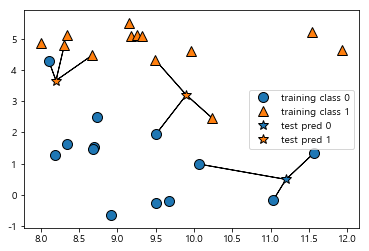

In [44]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [47]:
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()
print(X, y)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

[[ 9.96346605  4.59676542]
 [11.0329545  -0.16816717]
 [11.54155807  5.21116083]
 [ 8.69289001  1.54322016]
 [ 8.1062269   4.28695977]
 [ 8.30988863  4.80623966]
 [11.93027136  4.64866327]
 [ 9.67284681 -0.20283165]
 [ 8.34810316  5.13415623]
 [ 8.67494727  4.47573059]
 [ 9.17748385  5.09283177]
 [10.24028948  2.45544401]
 [ 8.68937095  1.48709629]
 [ 8.92229526 -0.63993225]
 [ 9.49123469  4.33224792]
 [ 9.25694192  5.13284858]
 [ 7.99815287  4.8525051 ]
 [ 8.18378052  1.29564214]
 [ 8.7337095   2.49162431]
 [ 9.32298256  5.09840649]
 [10.06393839  0.99078055]
 [ 9.50048972 -0.26430318]
 [ 8.34468785  1.63824349]
 [ 9.50169345  1.93824624]
 [ 9.15072323  5.49832246]
 [11.563957    1.3389402 ]] [1 0 1 0 0 1 1 0 1 1 1 1 0 0 1 1 1 0 0 1 0 0 0 0 1 0]


C:\Users\User\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


In [48]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [52]:
dir(clf)
print('테스트 셋 예측 : {}'.format(clf.predict(X_test)))

테스트 셋 예측 : [1 0 1 0 1 0 0]


In [53]:
print('테스트 셋 정확도 : {}'.format(clf.score(X_test, y_test)))

테스트 셋 정확도 : 0.8571428571428571


Figure(720x216) ,  [<matplotlib.axes._subplots.AxesSubplot object at 0x0000023B188E9828>


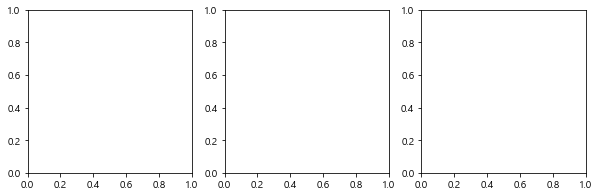

In [61]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))
print(fig, ", ", axes)

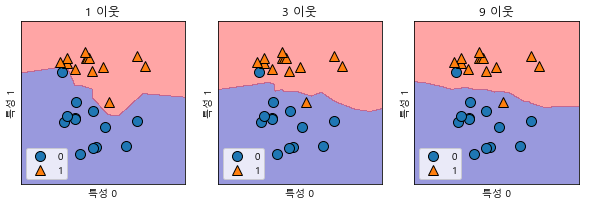

In [67]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))
for n_neighbors, ax in zip([1, 3, 9], axes):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, ax=ax, fill=True, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} 이웃".format(n_neighbors))
    ax.set_xlabel('특성 0')
    ax.set_ylabel('특성 1')

axes[0].legend(loc=3)
axes[1].legend(loc=3)
axes[2].legend(loc=3)

In [76]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=66)

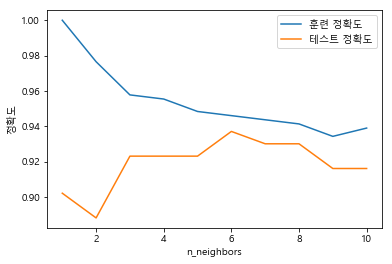

In [77]:
training_accuracy = []
test_accuracy = []
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    
    training_accuracy.append(clf.score(X_train, y_train))
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label='훈련 정확도')
plt.plot(neighbors_settings, test_accuracy, label='테스트 정확도')
plt.ylabel('정확도')
plt.xlabel('n_neighbors')
plt.legend()

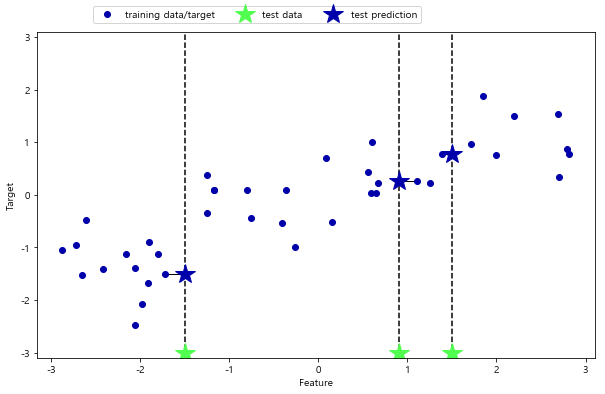

In [78]:
# 회귀분석을 위한 KNN

mglearn.plots.plot_knn_regression(n_neighbors=1)

In [80]:
from sklearn.neighbors import KNeighborsRegressor

X, y = mglearn.datasets.make_wave(n_samples=40)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [81]:
reg = KNeighborsRegressor(n_neighbors=3)
reg.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=3, p=2,
          weights='uniform')

In [82]:
print('테스트 세트 예측 : \n{}'.format(reg.predict(X_test)))
print('테스트 세트 R^2 : {:.2f}'.format(reg.score(X_test, y_test)))

테스트 세트 예측 : 
[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]
테스트 세트 R^2 : 0.83


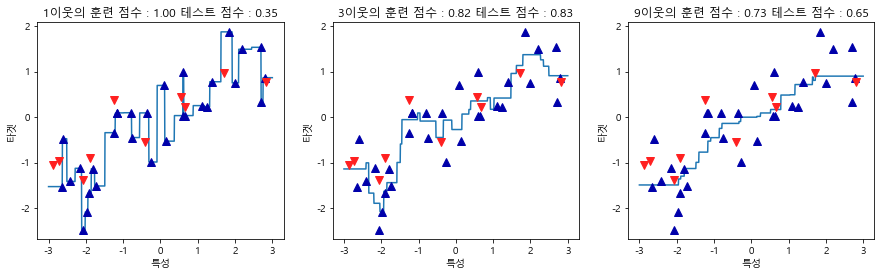

In [85]:
# 분석

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes):
    reg = KNeighborsRegressor(n_neighbors=n_neighbors).fit(X_train, y_train)
    
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, "^", c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, "v", c=mglearn.cm2(1), markersize=8)
    
    train = reg.score(X_train, y_train)
    test = reg.score(X_test, y_test)
    ax.set_title("{}이웃의 훈련 점수 : {:.2f} 테스트 점수 : {:.2f}".format(n_neighbors, train, test))
    ax.set_xlabel('특성')
    ax.set_ylabel('타겟')

In [104]:
# iris 데이터 사용
from sklearn.datasets import load_iris

iris_dataset = load_iris()
iris_dataset.keys()
print(iris_dataset.keys())
print(iris_dataset.target_names)
print(iris_dataset.feature_names)
print(type(iris_dataset.data))
print(iris_dataset.data.shape)
print(iris_dataset.target)
# print(iris_dataset['data'])

X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'], iris_dataset.target, random_state=0)

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])
['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
<class 'numpy.ndarray'>
(150, 4)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [105]:
print('X_train의 크기 : {}'.format(X_train.shape))
print('X_test의 크기 : {}'.format(X_test.shape))

X_train의 크기 : (112, 4)
X_test의 크기 : (38, 4)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023B1A9F7A90>,
      dtype=object)

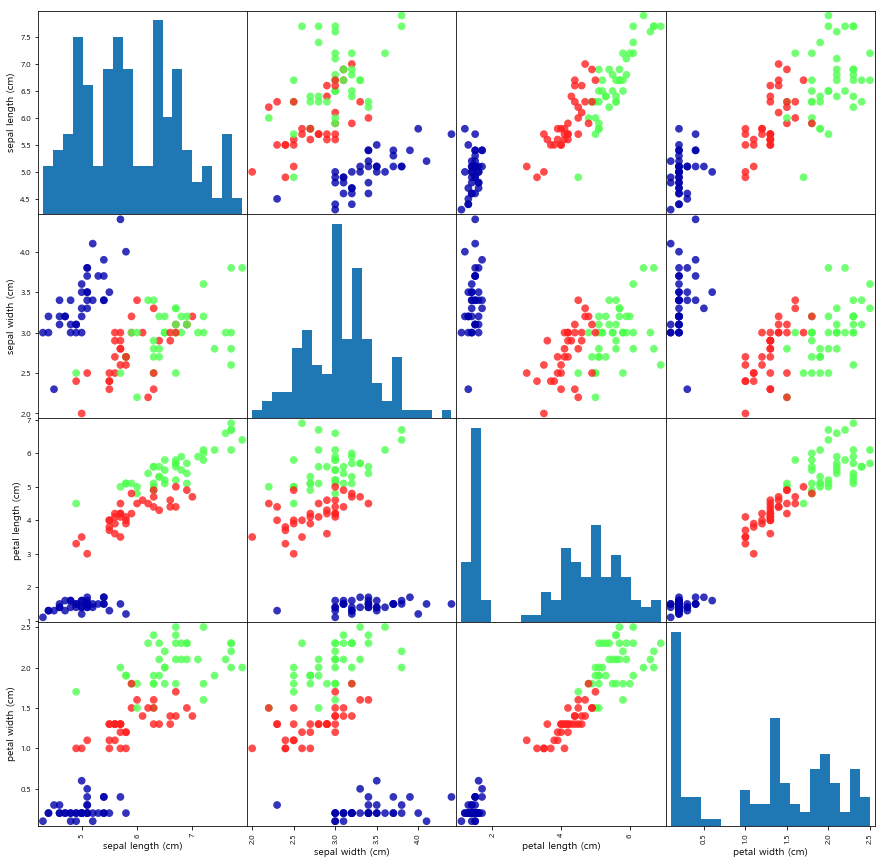

In [110]:
iris_dataframe = pd.DataFrame(X_train, columns=iris_dataset.feature_names)
iris_dataframe.head()
pd.plotting.scatter_matrix(iris_dataframe, figsize=(15, 15), marker='o', c=y_train, hist_kwds={'bins':20}, s=60, alpha=.8, cmap=mglearn.cm3)

In [111]:
knn = KNeighborsClassifier(n_neighbors=1).fit(X_train, y_train)

In [112]:
pred = knn.predict(X_test)

In [113]:
print("정확도 : ", knn.score(X_test, y_test))
print("정확도 : ", np.mean(pred == y_test))

정확도 :  0.9736842105263158
정확도 :  0.9736842105263158


In [114]:
# 꽃받침의 길이가 5cm, 폭 2.9cm, 꽃잎 길이 1cm, 폭 0.2cm인 붓꽃의 품종은?
X_new = np.array([[5, 2.9, 1, 0.2]])
pred = knn.predict(X_new)

In [115]:
pred
print(iris_dataset['target_names'][pred])

['setosa']


In [83]:
def createDataSet():
    group = array([[1.0, 2.0], [1.0, 4.0], [4.0, 1.0], [4.0, 2.0]])
    label = ['Action', 'Action', 'Romance', 'Romance']
    return group, label


In [101]:
import operator

def createDataSet():
    group = np.array([[1.0, 2.0], [1.0, 4.0], [4.0, 1.0], [4.0, 2.0]])
    label = ['Action', 'Action', "Romance", "Romance"]
    return group, label

def calcDistance(inX, dataSet, labels, k):
    # shape is a tuple that gives dimensions of the array
    # shape[0] returns the number of rows, here will return 4
    dataSetSize = dataSet.shape[0]  # dataSetSize = 4

    # numpy.tile(A, reps): construct an array by repeating A the number of times given by reps
    # if reps has length d, the result will have dimension of max(d, A.ndim)
    diffMat = np.tile(inX, (dataSetSize, 1)) - dataSet
    
    # **2 means square
    sqDiffMat = diffMat ** 2

    # sqDistances = x^2 + y^2
    sqDistances = sqDiffMat.sum(axis=1)
    
	# distance is equal to the square root of the sum of the squares of the coordinates
    distances = sqDistances ** 0.5
   
    # numpy.argsort() returns the indices that would sort an array
    # here returns [0 1 3 2]
    sortedDistIndices = distances.argsort()
    return sortedDistIndices

def findMajorityClass(inX, dataSet, labels, k, sortedDistIndices):
    classCount = {}   # iterate k times from the closest item
    for i in range(k):
        voteIlabel = labels[sortedDistIndices[i]] 
        # increase +1 on the selected label
        classCount[voteIlabel] = classCount.get(voteIlabel, 0) + 1 
		
    # classCount dictionary : {'Action': 2, 'Romantic': 1}
    # sort ClassCount Descending order
    return sorted(classCount.items(), key=operator.itemgetter(1), reverse=True)

def classify(inX, dataSet, labels, k):
    # calculate the distance between inX and the current point
    sortedDistIndices = calcDistance(inX, dataSet, labels, k)
    
	# take k items with lowest distances to inX and find the majority class among k items
    sortedClassCount = findMajorityClass(inX, dataSet, labels, k, sortedDistIndices)
    
	# sortedClassCount is now [('Action', 2)], therefore return Action
    return sortedClassCount[0][0]

In [103]:
group, label = createDataSet()
result = classify([2.0, 3.0], group, label, 1)
print("결과는 {} 이다.".format(result))

결과는 Action 이다.
